In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/women-entrepreneurship-and-labor-force/Dataset3.csv


# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Read Dataset**

In [4]:
data = pd.read_csv('../input/women-entrepreneurship-and-labor-force/Dataset3.csv', delimiter=';', encoding = "ISO-8859-1")
data.head()

# **Shape of the dataset**

In [6]:
data.shape

(51, 9)

# **Create a copy of dataframe for future categorical plots**

In [7]:
meta = data.copy()

# **Import label encoder to encode categorical values**

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# **Encode the categorical columns as numericals**

In [9]:
data['Level of development'] = le.fit_transform(data['Level of development'])
data['European Union Membership'] = le.fit_transform(data['European Union Membership'])
data['Currency'] = le.fit_transform(data['Currency'])

# Display encoded data

In [10]:
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,0,0,0,54.9,64.9,0.90,67.1
1,6,Belgium,0,0,0,63.6,65.5,0.60,58.0
2,17,Estonia,0,0,0,55.4,60.2,-0.88,68.5
3,18,Finland,0,0,0,66.4,65.7,-0.20,67.7
4,19,France,0,0,0,68.8,67.3,0.00,60.6


# **Create heatmap to display correlation between the features**

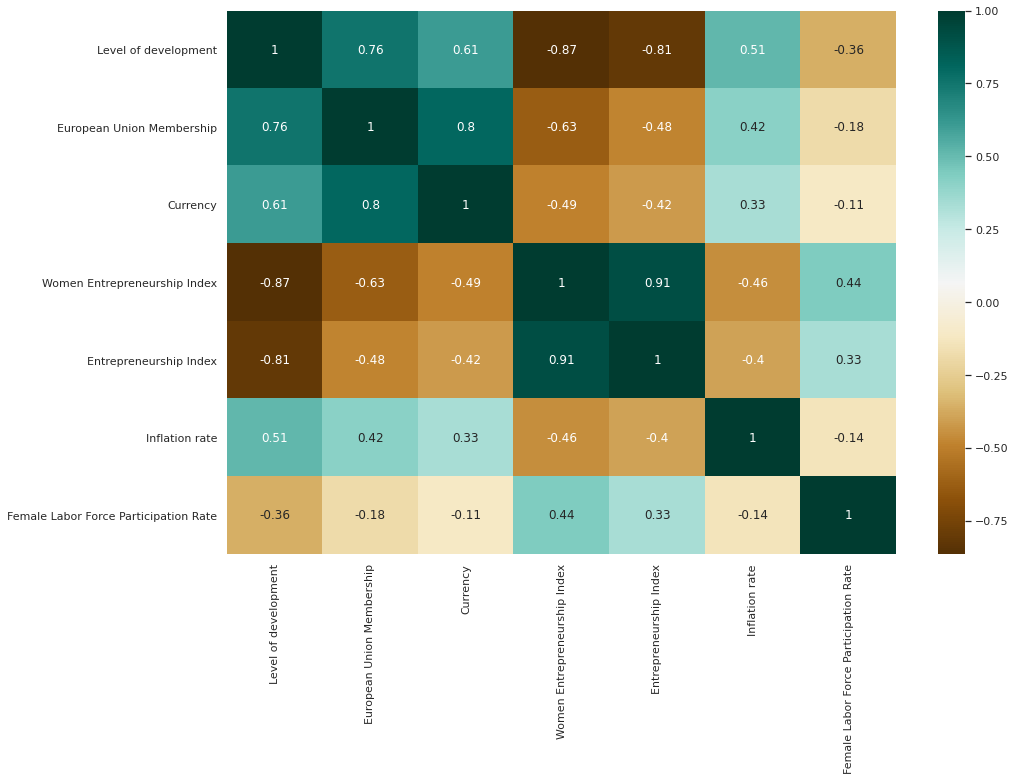

In [33]:
sns.heatmap(data.iloc[:,2:].corr(), annot = True, cmap = 'BrBG')
sns.set(rc={'figure.figsize':(15,10)})

# **Divide data into two sub-datasets on the basis of *Level of Development***

In [12]:
dev = data[data['Level of development'] != 1]
undev = data[data['Level of development'] == 1]

# Divide data into two sub-datasets on the basis of *European Union Membership*

In [13]:
member = meta[meta['European Union Membership'] == 'Member']
notmember = meta[meta['European Union Membership'] != 'Member']

# Mean *Women Entrepreneurship Index* in developed and developing countries

In [77]:
print('Developed Countries\' Mean Women Entrepreneurship Index:',dev['Women Entrepreneurship Index'].mean())
print('Developing Countries\' Mean Women Entrepreneurship Index:',undev['Women Entrepreneurship Index'].mean())

Developed Countries' Mean Women Entrepreneurship Index: 59.35925925925926
Developing Countries' Mean Women Entrepreneurship Index: 34.87083333333333


# Stripplot distribution of *Women Entrepreneurship Index* in developed and developing countries

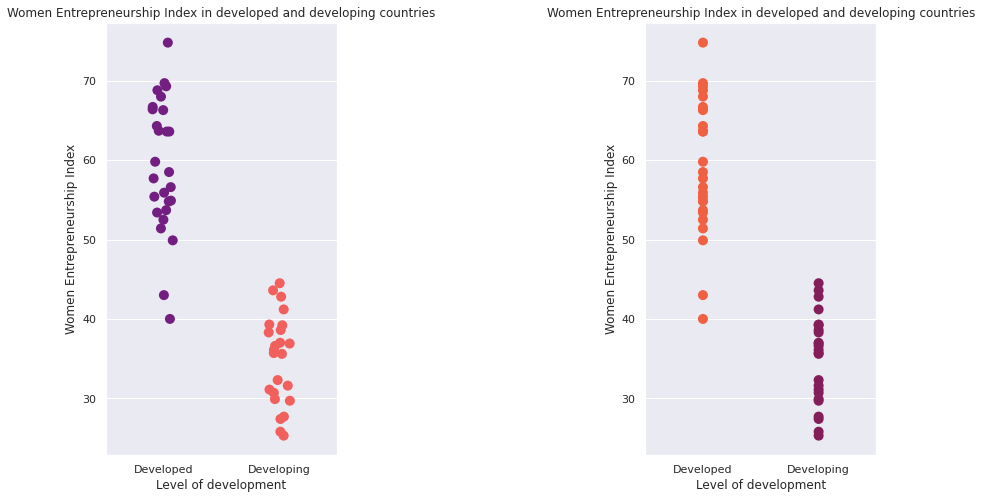

In [81]:
fig, ax =plt.subplots(1,2)
sns.stripplot(x = 'Level of development', y = 'Women Entrepreneurship Index', data = meta, ax = ax[0], s = 10, palette = 'magma').set_title('Women Entrepreneurship Index in developed and developing countries')
sns.stripplot(x = 'Level of development', y = 'Women Entrepreneurship Index', data = meta, ax = ax[1], jitter = False, s = 10, palette = 'rocket_r').set_title('Women Entrepreneurship Index in developed and developing countries')
fig.tight_layout(pad=2.0)
fig.set_size_inches(15.5, 7.5, forward=True)
fig.show()

# Box and Boxen distribution of *Women Entrepreneurship Index* in developed and developing countries

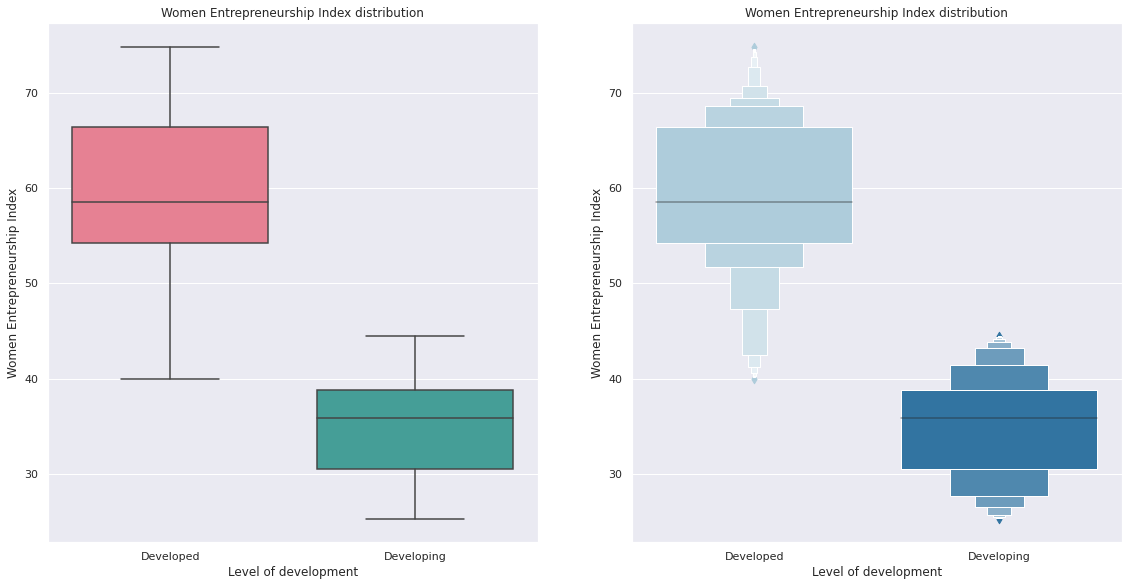

In [83]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'Level of development', y = 'Women Entrepreneurship Index', data = meta, ax = ax[0], palette = 'husl').set_title('Women Entrepreneurship Index distribution')
sns.boxenplot(x = 'Level of development', y = 'Women Entrepreneurship Index', data = meta, ax = ax[1], palette = 'Paired').set_title('Women Entrepreneurship Index distribution')
fig.tight_layout(pad=1.0)
fig.set_size_inches(16.5, 8.5, forward=True)
fig.show()

# Distribution of member and non member countries in Europian Union

Text(0.5, 1.0, 'Distribution of member and non member countries in Europian Union')

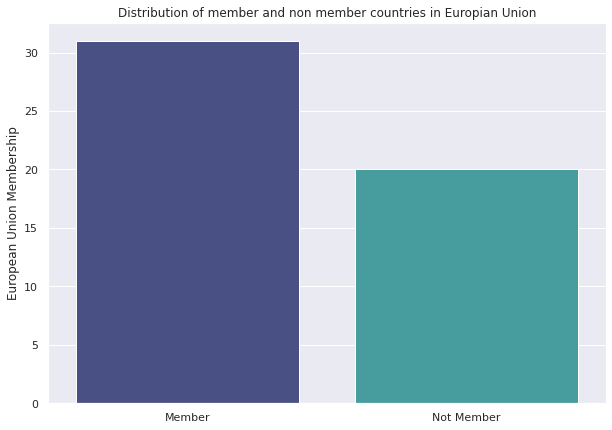

In [85]:
sns.barplot(x = meta['European Union Membership'].unique(), y = meta['European Union Membership'].value_counts(), palette = 'mako').set_title('Distribution of member and non member countries in Europian Union')

# *Women Entrepreneurship Index* in member and non member countries in Europian Union

Text(0.5, 1.0, 'Women Entrepreneurship Index in member and non member countries in Europian Union')

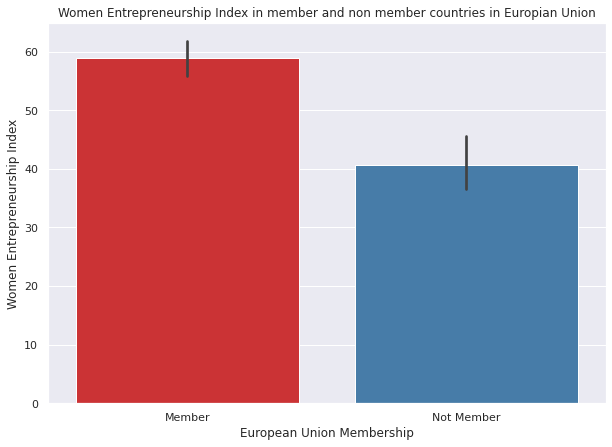

In [86]:
sns.barplot(x = meta['European Union Membership'], y = meta['Women Entrepreneurship Index'], palette = 'Set1').set_title('Women Entrepreneurship Index in member and non member countries in Europian Union')

# Relationship between *Global Entrepreneurship Index* and *Women Entrepreneurship Index* between member and non member countries in Europian Union

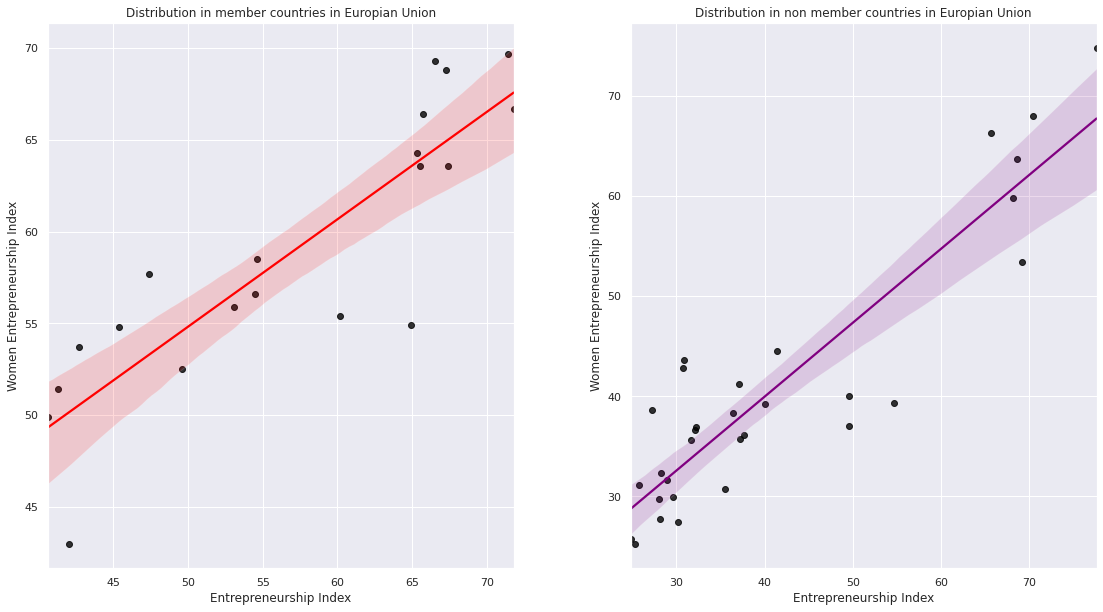

In [90]:
fig, ax =plt.subplots(1,2)
sns.regplot(x = 'Entrepreneurship Index', y = 'Women Entrepreneurship Index', data = member, ax = ax[0], scatter_kws={"color": "black"}, line_kws={"color": "red"}).set_title('Distribution in member countries in Europian Union')
sns.regplot(x = 'Entrepreneurship Index', y = 'Women Entrepreneurship Index', data = notmember, ax = ax[1], scatter_kws={"color": "black"}, line_kws={"color": "purple"}).set_title('Distribution in non member countries in Europian Union')
fig.tight_layout(pad=0.1)
fig.set_size_inches(16.5, 8.5, forward=True)
fig.show()

# Overall relationship between *Global Entrepreneurship Index* and *Women Entrepreneurship Index* between member and non member countries in Europian Union

Text(0.5, 1.0, 'Overall Distribution of countries')

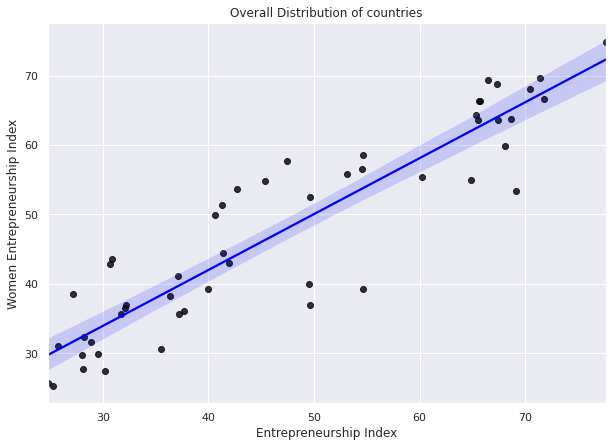

In [91]:
sns.regplot(x = 'Entrepreneurship Index', y = 'Women Entrepreneurship Index', data = meta, scatter_kws={"color": "black"}, line_kws={"color": "blue"}).set_title('Overall Distribution of countries')

# Distribution of developed and developing countries who are not the members of Europian Union

Text(0.5, 1.0, 'Distribution of developed and developing countries who are not the members of Europian Union')

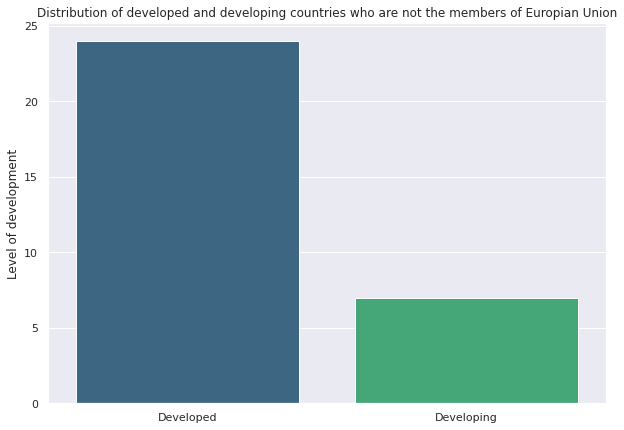

In [92]:
sns.barplot(x = notmember['Level of development'].unique(), y = notmember['Level of development'].value_counts(), data = notmember, palette = 'viridis').set_title('Distribution of developed and developing countries who are not the members of Europian Union')

# Distribution of developed and developing countries who are the members of Europian Union

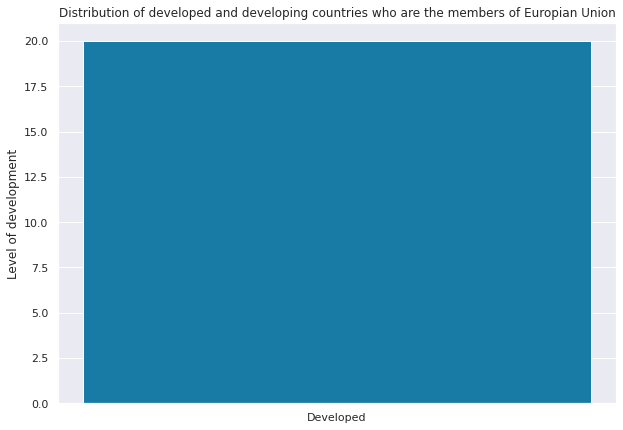

In [93]:
sns.barplot(x = member['Level of development'].unique(), y = member['Level of development'].value_counts(), data = member, color = '#0084bd').set_title('Distribution of developed and developing countries who are the members of Europian Union')
sns.set(rc={'figure.figsize':(10,7)})